<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Analyzing Housing Prices in Boston: Insights for Strategic Decisions

#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import numpy as np

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Overview of dataset


In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Task2 : Generate Descriptive Statistics and Visualizations

#### Boxplot for Median value of owner-occupied homes

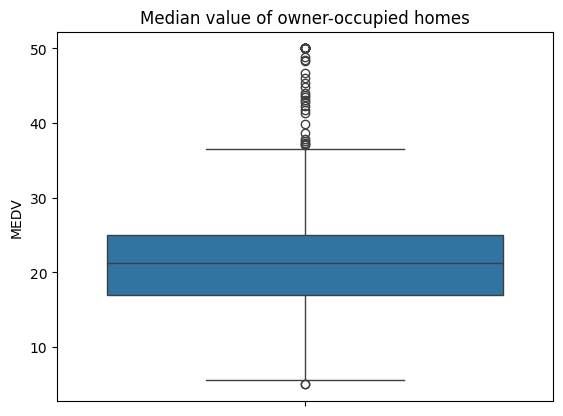

In [13]:
ax = sns.boxplot(y='MEDV', data=boston_df)

ax.set_title('Median value of owner-occupied homes')
plt.show()

### Explanation
The boxplot for MEDV shows that the median home value is around $21,000.There are several high-value outliers, indicating that a small number of homes are significantly more expensive than the majority.

#### bar plot for the Charles river variable

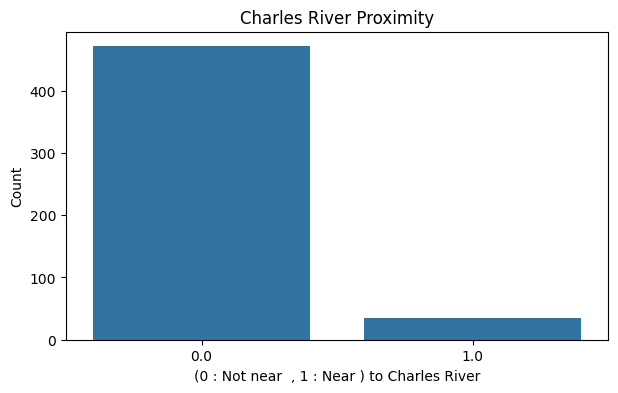

In [16]:

plt.figure(figsize=(7,4))
sns.countplot(x=boston_df['CHAS'])
plt.title("Charles River Proximity")
plt.xlabel("(0 : Not near  , 1 : Near ) to Charles River")
plt.ylabel("Count")
plt.show()     

### Explanation
the bar plot shows that most of housing tracts do not border the Charles River (CHAS = 0), while only a small number do (CHAS = 1). 

#### boxplot for the MEDV variable vs the AGE variable

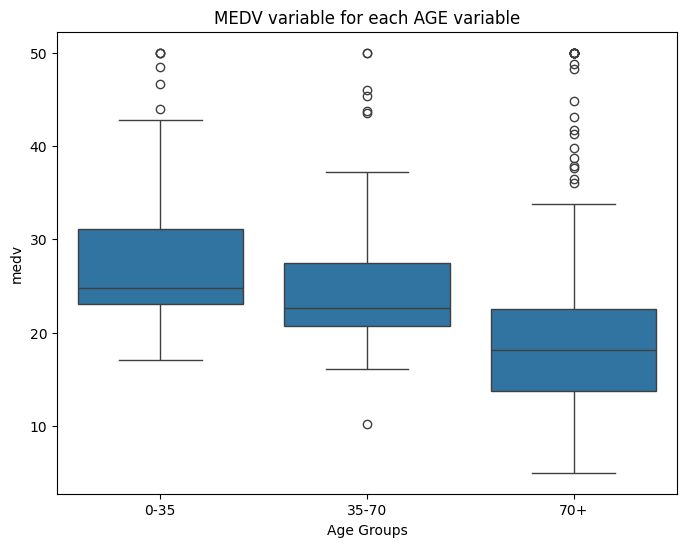

In [23]:
bins = [0, 35, 70, np.inf]
labels = ['0-35', '35-70', '70+']
boston_df['age_groups'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(8,6))
sns.boxplot(x=boston_df['age_groups'], y=boston_df['MEDV'])
plt.title("MEDV variable for each AGE variable")
plt.xlabel("Age Groups")
plt.ylabel("medv")
plt.show()

### Explanation
The boxplot indicates that neighborhoods with newer buildings (AGE group 0–35) generally have higher median home values, while areas with older buildings (AGE group 70+) tend to have lower values. This suggests a negative association between building age and home value.

#### scatter plot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

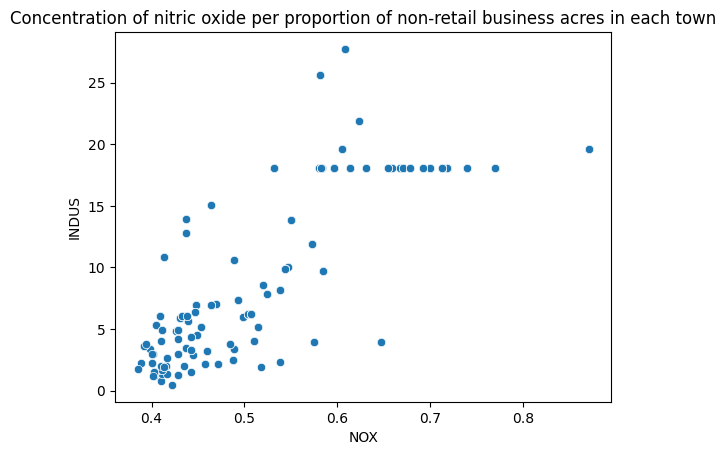

In [25]:
ax4 = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax4.set_title('Concentration of nitric oxide per proportion of non-retail business acres in each town')
plt.show()

### Explanation
#### What can we say about the relationship?
##### The scatter plot indicates a positive linear correlation between the proportion of non-retail business town and nitric oxide concentration. Towns with greater industrial activity generally exhibit higher levels of NOx.

#### histogram for the pupil to teacher ratio variable

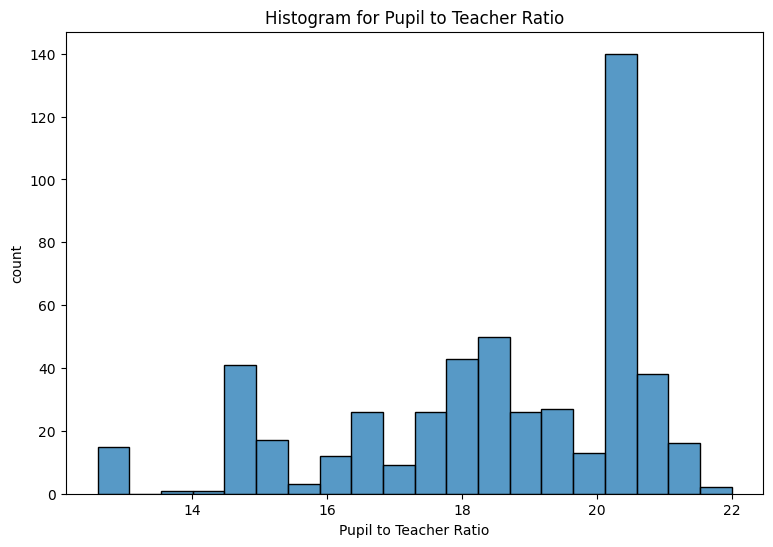

In [27]:
plt.figure(figsize=(9,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
plt.title("Histogram for Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("count")
plt.show()

### Explanation
The histogram of the pupil-to-teacher ratio shows that most have a ratio clustered around 19 to 21 

### Task 3: tests

#### Question 1 :Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### Hypothesis Statements
H₀ (null hypothesis): There is no significant difference in the median home values between houses located by the Charles River (CHAS=1) and those that are not (CHAS=0).

H₁ (alternative hypothesis): There is a significant difference in the median home values between these two groups.


In [35]:
from scipy.stats import ttest_ind
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
# t_stat, p_value = ttest_ind(group1, group0, equal_var=False) 

t_stat, p_value = scipy.stats.ttest_ind(group1, group0, equal_var=True)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.9964
P-value: 0.0001


In [36]:
alpha = 0.05

if p_value < alpha:
    print("We reject H₀: There is a significant difference in MEDV based on CHAS.")
else:
    print("We do not reject H₀: There is no significant difference in MEDV based on CHAS.")

We reject H₀: There is a significant difference in MEDV based on CHAS.


#### Question 2 : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
##### Hypothesis Statements
H₀ (null hypothesis): The means of MEDV are equal for all groups of AGE.

H₁ (alternative hypothesis): At least one of the means of MEDV is different.

In [37]:
from scipy.stats import f_oneway

group1 = boston_df[boston_df['age_groups'] == "0-35"]['MEDV']
group2 = boston_df[boston_df['age_groups'] == "35-70"]['MEDV']
group3 = boston_df[boston_df['age_groups'] == "70+"]['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 36.4076
P-value: 0.0000


In [38]:
alpha = 0.05
if p_value < alpha:
    print("We reject H₀: There is a significant difference in median home values based on age groups.")
else:
    print("We do not reject H₀: No significant difference detected.")

We reject H₀: There is a significant difference in median home values based on age groups.


#### Question 3 :  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
##### Hypothesis Statements
H₀ (null hypothesis): There is no linear correlation between the two variables.

H₁ (alternative hypothesis): There is a significant linear correlation between the two variables.

In [40]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient r = {r_value:.4f}")
print(f"P-value = {p_value:.4f}")

Correlation coefficient r = 0.7637
P-value = 0.0000


In [41]:
alpha = 0.05
if p_value < alpha:
    print("We reject H₀: There is a significant linear relationship between NOX and INDUS.")
else:
    print("We do not reject H₀: No significant linear relationship has been detected.")

We reject H₀: There is a significant linear relationship between NOX and INDUS.


#### Question 4 :  What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
##### Hypothesis Statements
H₀ (null hypothesis): There is no significant impact of the distance to employment centers on the median value of homes.

H₁ (alternative hypothesis): This means there is a significant impact of the distance to employment centers on the median value of homes.

In [45]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.21e-08
Time:                        21:59:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### distance to employment centers significantly affects the median value of homes : as the distance to employment centers increases, the median value of homes increases by 1.0916.